# Classification with Diabetes

## Initialization of the imports and the CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(len(df))

768


## Import sklearn -> LogisticRegression AND train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[["BMI", "Age"]]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Prediction -> true or false -> 1 or 0

In [4]:
print(model.predict(X_test))

[0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]


### Score

In [5]:
print(model.score(X_test, y_test))

0.6979166666666666


### true or false prediction?

In [6]:
y_test_pred = model.predict(X_test)

print(y_test_pred == y_test)

163     True
248     True
231     True
168     True
686     True
       ...  
19     False
596    False
320     True
149     True
645     True
Name: Outcome, Length: 192, dtype: bool


### Prediction of the percentage of diabetics in a sample -> between 0 and 100%
#### First entry in array -> Percentage of not having Diabetes | Second entry -> Percentage of having Diabetes
##### second entry > 50% -> sample has Diabetes

In [7]:
y_test_pred = model.predict(X_test)

print(np.mean(y_test_pred == y_test))

0.6979166666666666


In [8]:
print(model.predict(X_test))
model.predict_proba(X_test)

[0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]


array([[0.82210782, 0.17789218],
       [0.58911374, 0.41088626],
       [0.22211946, 0.77788054],
       [0.71836607, 0.28163393],
       [0.89267859, 0.10732141],
       [0.79554992, 0.20445008],
       [0.4943712 , 0.5056288 ],
       [0.87700125, 0.12299875],
       [0.3116315 , 0.6883685 ],
       [0.71977059, 0.28022941],
       [0.38107895, 0.61892105],
       [0.61599376, 0.38400624],
       [0.61583549, 0.38416451],
       [0.64831957, 0.35168043],
       [0.54849764, 0.45150236],
       [0.62380769, 0.37619231],
       [0.67564458, 0.32435542],
       [0.78425509, 0.21574491],
       [0.54077076, 0.45922924],
       [0.67963213, 0.32036787],
       [0.77605572, 0.22394428],
       [0.40019179, 0.59980821],
       [0.87487214, 0.12512786],
       [0.6166886 , 0.3833114 ],
       [0.91810682, 0.08189318],
       [0.74965844, 0.25034156],
       [0.53615105, 0.46384895],
       [0.73807874, 0.26192126],
       [0.62036428, 0.37963572],
       [0.49328415, 0.50671585],
       [0.

### Creating new sample and check diabetes with true false AND percentage

In [9]:
X_pred = pd.DataFrame([[28, 40]], columns = ["BMI", "Age"])

print(X_pred.head())
print(model.predict(X_pred))
print(model.predict_proba(X_pred))

   BMI  Age
0   28   40
[0]
[[0.68696895 0.31303105]]


# Creating Confusion Matrix
### Necessary, if classes are very unbalanced -> Dataset e.g. 2 Mio Diabetes and 10 Mio no Diabetes

In [10]:
# Matplotlib config
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figrue.figsize' : (5.0, 4.0)}

X = df[["BMI", "Age", "Glucose", "BloodPressure"]]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_test_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred, normalize = 'all', labels = model.classes_)

print(cm)

[[0.55208333 0.0625    ]
 [0.17708333 0.20833333]]


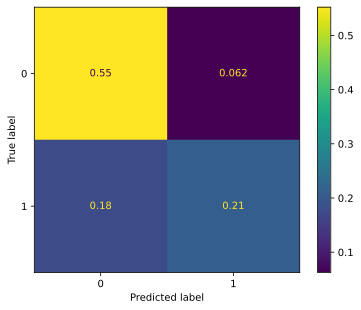

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

plt.show()

## Precision and Recall
##### Recall: If a person from our test data actually has diabetes, then we recognize this XX percent of the time.
##### Precision: If a person receives a positive test result, XX percent of them actually have diabetes.

In [23]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred)

0.5405405405405406

In [24]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred)

0.7692307692307693

# Improve the weighting of classes

In [25]:
df.groupby("Outcome").agg(c = ("Age", len))

,c
Outcome,
0,500
1,268


In [27]:
model = LogisticRegression(class_weight = {0: 1 / 500, 1: 1 / 268})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.002, 1: 0.0037313432835820895})

# Heatmap

In [28]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

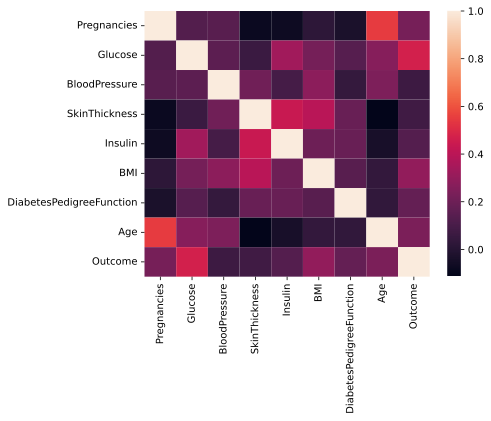

In [29]:
sns.heatmap(df.corr())

In [30]:
df.corr()["Outcome"].abs().sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

# K Nearest Neighbors (KNN) Model